In [1]:
conda install -c conda-forge kneed

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [24]:
import sqlite3

In [25]:
from sklearn import linear_model

In [26]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [27]:
data=pd.read_csv('C:\\Users\\Admin\\Desktop\\vien_phi.csv')

In [28]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [29]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


# MODELING

## Linear regression with ols

In [30]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


charges = age + sex + bmi + children + smoker + region

Y là biến phụ thuộc

age,sex,bmi,children,smoker,region là biến độc lập

In [31]:
from statsmodels.formula.api import ols

fit = ols('charges ~ age + C(sex) + bmi + children + C(smoker) + C(region)', data=data).fit() 

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:40:19   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
C(sex)[T.male]          -131.3144    332.945     -0.394      0.693    -784.470     521.842
C(smoker)[T.yes]        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
C(region)[T.northwest]  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
C(region)[T.southeast] -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
C(region)[T.southwest]  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
age                      256.8564     11.899     21.587      0.000     233.514     280.199
bmi                      339.1935     28.599     11.860      0.000     283.088     395.298
children                 475.5005    137.804      3.451      0.001     205.163     745.838
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2 = 0.75 => các biến độc lập đóng góp 75 % vào sự thay đổi của biến phụ thuộc

Dựa vào P_value với độ tin vậy 95 % ta có

Biến độc lập sex không ảnh hưởng đến biến phụ thuộc charges (0.693 > 0.05)

Biến độc lập smoker ảnh hưởng mạnh đến biến phụ thuộc charges (0.000 < 0.05)

Biến độc lập region không ảnh hưởng đến biến phụ thuộc charges

Biến độc lập age ảnh hưởng mạnh đến biến phụ thuộc charges (0.000 > 0.05)

Biến độc lập bmi ảnh hưởng mạnh đến biến phụ thuộc charges (0.693 > 0.05)

### => phân tích kĩ vào 3 biến age, bmi, smoker để lấy insight(file tableau)

# Kmeans clustering

In [32]:
str(data[['age','charges']].iloc[1].values)

'[  18.     1725.5523]'

In [33]:
list(data[['age','charges']].iloc[1].values)

[18.0, 1725.5523]

In [34]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


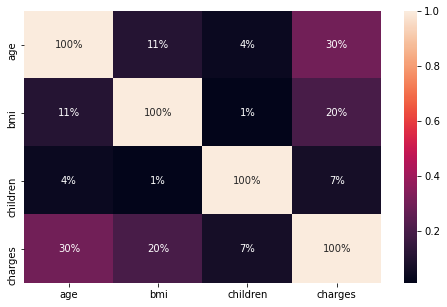

In [35]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True, fmt ='.0%')
plt.show()

In [36]:
array=[]
for i in range(len(data)):
    array.append(list(data[['age','charges']].iloc[i].values))

Mục đích: Tìm các phân loại nhóm tuổi

Chọn cột charges vào mảng bởi vì cột charges hệ số tương quan cao nhất với age (0.299)

In [37]:
array

[[19.0, 16884.924],
 [18.0, 1725.5523],
 [28.0, 4449.462],
 [33.0, 21984.47061],
 [32.0, 3866.8552],
 [31.0, 3756.6216],
 [46.0, 8240.5896],
 [37.0, 7281.5056],
 [37.0, 6406.4107],
 [60.0, 28923.136919999997],
 [25.0, 2721.3208],
 [62.0, 27808.7251],
 [23.0, 1826.8429999999998],
 [56.0, 11090.7178],
 [27.0, 39611.7577],
 [19.0, 1837.237],
 [52.0, 10797.3362],
 [23.0, 2395.17155],
 [56.0, 10602.385],
 [30.0, 36837.467000000004],
 [60.0, 13228.84695],
 [30.0, 4149.736],
 [18.0, 1137.011],
 [34.0, 37701.8768],
 [37.0, 6203.90175],
 [59.0, 14001.1338],
 [63.0, 14451.83515],
 [55.0, 12268.63225],
 [23.0, 2775.19215],
 [31.0, 38711.0],
 [22.0, 35585.576],
 [18.0, 2198.18985],
 [19.0, 4687.7970000000005],
 [63.0, 13770.0979],
 [28.0, 51194.55914],
 [19.0, 1625.43375],
 [62.0, 15612.19335],
 [26.0, 2302.3],
 [35.0, 39774.2763],
 [60.0, 48173.361],
 [24.0, 3046.062],
 [31.0, 4949.7587],
 [41.0, 6272.4772],
 [37.0, 6313.759],
 [38.0, 6079.6715],
 [55.0, 20630.28351],
 [18.0, 3393.35635],
 [28.0,

In [38]:
array=np.asanyarray(array)

In [41]:
scaler=StandardScaler()
scaler_features=scaler.fit_transform(array)

In [42]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="random",n_init=10,max_iter=100,random_state=42,)
    kmeans.fit(scaler_features)
    sse.append(kmeans.inertia_)

In [43]:
sse

[2675.999999999995,
 1476.4640283334625,
 752.6064173157388,
 576.4299891424226,
 419.70609109806503,
 332.59060138121464,
 272.6412409815369,
 196.41190269213143,
 169.75010853276967,
 145.99465324726788]

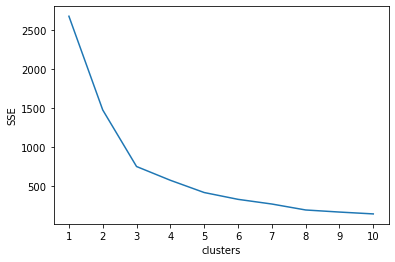

In [44]:
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("clusters")
plt.ylabel("SSE")
plt.show()

=> K bằng 3 or 4

In [45]:
KneeLocator(range(1,11), sse, curve='convex', direction='decreasing').elbow

3

## => K =3

In [46]:
from sklearn.cluster import KMeans

In [47]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42)
kmeans

KMeans(init='random', n_clusters=3, random_state=42)

In [48]:
array=np.asanyarray(data[['age', 'charges']])

In [49]:
array

array([[1.90000000e+01, 1.68849240e+04],
       [1.80000000e+01, 1.72555230e+03],
       [2.80000000e+01, 4.44946200e+03],
       ...,
       [1.80000000e+01, 1.62983350e+03],
       [2.10000000e+01, 2.00794500e+03],
       [6.10000000e+01, 2.91413603e+04]])

In [50]:
kmeans.fit_transform(array)

array([[24212.99713948, 10268.54125288,  2800.8210984 ],
       [39372.36593206,  4890.88669718, 17960.0980419 ],
       [36648.45209004,  2166.9589985 , 15236.1778181 ],
       ...,
       [39468.08471739,  4986.60474159, 18055.81674008],
       [39089.97171568,  4608.48461198, 17677.70144581],
       [11956.57062638, 22524.9727975 ,  9455.74397192]])

In [63]:
centers=(kmeans.cluster_centers_)

In [52]:
array=np.asanyarray(array)

In [53]:
array

array([[1.90000000e+01, 1.68849240e+04],
       [1.80000000e+01, 1.72555230e+03],
       [2.80000000e+01, 4.44946200e+03],
       ...,
       [1.80000000e+01, 1.62983350e+03],
       [2.10000000e+01, 2.00794500e+03],
       [6.10000000e+01, 2.91413603e+04]])

In [54]:
p=kmeans.fit_predict(array)

In [55]:
p

array([2, 1, 1, ..., 1, 1, 2])

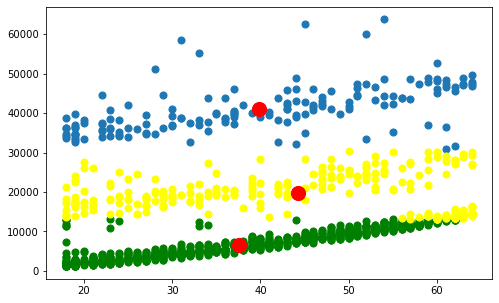

In [64]:
plt.figure(figsize=(8,5))
plt.scatter(array[p == 0,0], array[p ==0,1], s=50)
plt.scatter(array[p == 1,0], array[p ==1,1], s=50, color='green')
plt.scatter(array[p == 2,0], array[p ==2,1], s=50, color='yellow')
plt.scatter(centers[:, 0], centers[:, 1], s=200, color='red')

In [65]:
kmeans.inertia_

23040480730.60742

# Get insight from querry data

In [72]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [69]:
conn=sqlite3.connect('C:\\Users\\Admin\\Desktop\\vien_phi.db')
c=conn.cursor()

In [70]:
c.execute('create table vien_phi({})'.format(','.join(data.columns)))
for row in data.iterrows():
    c.execute('insert into vien_phi({}) values ({})'.format(' ,'.join(data.columns), ' ,'.join(['?']*len(data.columns))), tuple(row[1]))
conn.commit()

OperationalError: table vien_phi already exists

In [75]:
data_sql=pd.read_sql('select children, charges from (select * from vien_phi order by children) sort group by children', conn)

In [76]:
data_sql

,children,charges
0,0,16884.9240
1,1,1725.5523
2,2,6406.4107
3,3,4449.4620
4,4,4504.6624
5,5,4687.7970


Text(0, 0.5, 'mandatory charges')

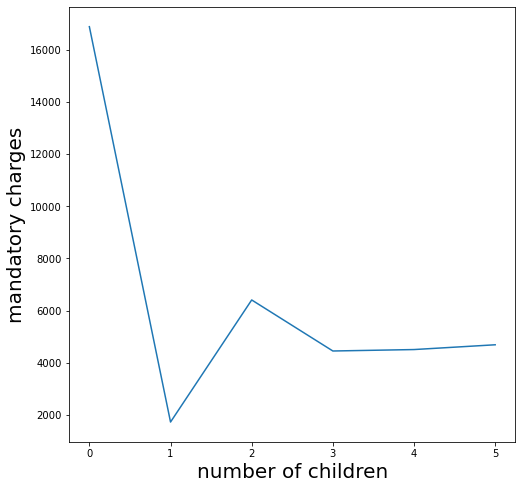

In [89]:
plt.figure(figsize=(8,8))
plt.plot(data_sql['children'], data_sql['charges'])
plt.xlabel('number of children', size=20)
plt.ylabel('mandatory charges', size=20)

=> People who have't had children tend to be ill than people have children

=> people having one children is less ill than people have many children

# Bỏ

# Kmeans pipe

preprocessor = Pipeline([
    ("scaler", MinMaxScaler()),
    ("pca", PCA(n_components=2, random_state=42))
    ])

clusterer = Pipeline([
            (
                    "kmeans",
                    KMeans(
                        n_clusters=5,
                        init="random",
                        n_init=50,
                        max_iter=500,
                        random_state=42,
                ),
            ),
        ]
    )

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("clusterer", clusterer)
    ])

pipe.fit(data_sql)

pcada = pd.DataFrame(
    pipe["preprocessor"].transform(data_sql),
    columns=["age", "charges"])

pcada['a']=pipe["clusterer"]["kmeans"]

plt.figure(figsize=(8, 8))
scat = sns.scatterplot(
    "age",
    "charges",
    hue="a",
    s=50,
    data=pcada,
    palette="Set2",
)


plt.show()



(BỎ)

In [21]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [76]:
data['sex'].replace({'male':1,'female':0}, inplace=True)
data['smoker'].replace({'yes':1,'no':0}, inplace=True)
data['region'].replace({'southwest':0,'southeast':1,'northwest':2, 'northeast': 3}, inplace=True)

In [96]:
data['charges']=data['charges'] / 1000

In [97]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16.884924
1,18,1,33.770,1,0,1,1.725552
2,28,1,33.000,3,0,1,4.449462
3,33,1,22.705,0,0,2,21.984471
4,32,1,28.880,0,0,2,3.866855
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10.600548
1334,18,0,31.920,0,0,3,2.205981
1335,18,0,36.850,0,0,1,1.629833
1336,21,0,25.800,0,0,0,2.007945


In [98]:
reg = linear_model.LinearRegression()
reg.fit(data[['age', 'bmi']], data['charges'])

LinearRegression()

In [99]:
reg.coef_

array([0.24193078, 0.33296509])

In [101]:
reg.r_square

AttributeError: 'LinearRegression' object has no attribute 'r_square'